In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(10)
import collections
import pandas as pd

In [ ]:
#@title
#Generate Random Starting Pool of N sequences of length L
def make_starting_pool(L, N):
  return ["".join([random.choice(['A', 'C', 'G','U']) for i in range(L)]) for i in range(N)]

def selection(round, pool, motif):
  #Determine Longest Submotif Present in Each Sequence (if any)
  sub_motifs = [[motif[x:x+subset] for x in range(len(motif)-(subset-1))] for subset in range(4,1+len(motif))]
  sub_motifs.reverse()
  contained_sub_motifs = []
  seqs_containing_sub_motifs = []
  for seq in pool:
    for sub_mot in sub_motifs:
      if sub_mot[0] in seq:
        contained_sub_motifs.append(sub_mot[0])
        seqs_containing_sub_motifs.append(seq)
        break
  
  round_n_plus_one = []
  #If a sequence has a submotif, its chance of selection and moving to the next round is proportional to the length of motif overlap it has (offset by a factor that increases per round)
  for motif_seq in range(len(contained_sub_motifs)):
    cutoff = noise()*(len(contained_sub_motifs[motif_seq]))**len_scale_factor-del_pressure*round
    value = random.random()
    if cutoff>value:
      round_n_plus_one.append(seqs_containing_sub_motifs[motif_seq])

  #If a sequence has no submotifs, it still has a baseline chance of moving to the next round of selection 
  for seq in pool:
    cutoff = noise()
    value = random.random()
    if cutoff>value:
      round_n_plus_one.append(seq)

  return round_n_plus_one, contained_sub_motifs
def rounds_of_selection(num_rounds, motif_selected_for, starting_pool):
  seqs_all_rounds = []
  seqs_all_rounds.append(starting_pool)
  mean_len_submotifs = []

  for round in range(num_rounds):
    round_n, round_n_minus_one_motifs = selection(round, seqs_all_rounds[-1], motif_selected_for)

    submotif_lens = []
    for submot in round_n_minus_one_motifs:
      submotif_lens.append(len(submot))
      
    mean_len_submotifs.append(np.mean(submotif_lens))
    seqs_all_rounds.append(round_n)

  return seqs_all_rounds, mean_len_submotifs

def plot_selection(num_rounds, slxn_seqs, slxn_mean_lens):
  seqs_per_round = []
  for round in range(len(slxn_seqs)):
    seqs_per_round.append(len(slxn_seqs[round]))
  print(seqs_per_round)
  fig, ax1 = plt.subplots(figsize = (11,5))
  ax2 = ax1.twinx()
  ax1.plot(range(1,num_rounds+1), np.array(pd.DataFrame(np.log(slxn_mean_lens)).replace([np.nan, -np.nan], 0)), marker = 'o', color = 'purple', label = 'Log Mean Sub-Motif Length')
  ax1.set_ylim(0, max(np.log(slxn_mean_lens))+.5)
  ax1.set_ylabel('Log Mean Sub-Motif Length')
  ax2.plot(range(num_rounds+1), np.array(pd.DataFrame(np.log(seqs_per_round)).replace([np.inf, -np.inf], 0)), marker = 'o', color = 'blue', label = 'Log Number of Sequences')
  ax2.set_ylim(0, max(np.array(pd.DataFrame(np.log(seqs_per_round)).replace([np.inf, -np.inf], 0)))+.5)
  ax2.set_ylabel('Log Number of Sequences')
  ax1.set_xlabel('Round')

  fig.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log


[10000, 927, 216, 73, 27, 7, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


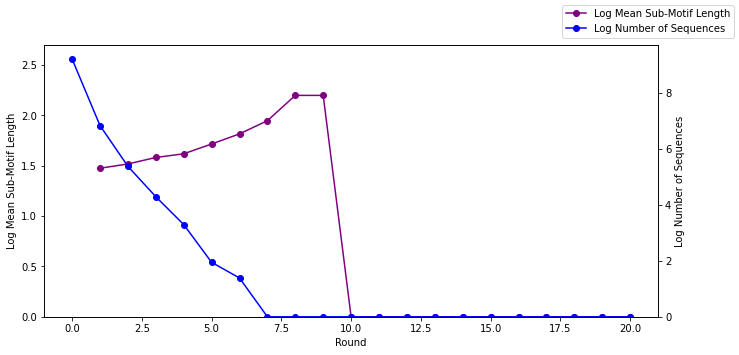

In [ ]:
#Number of seqs in starting pool 
N = 10000
#Sequence Length (of randomized region)
L = 100
#Number of Rounds of Selection
r = 20
#Motif we want
motif = 'CGAUCGAUCGAU'
#Baseline selection noise
def noise():
  return random.random()/30
#Change in selection pressure per round
del_pressure = 0

#####
len_scale_factor = 1.8
starting_pool = make_starting_pool(L,N)
slxn_seqs, slxn_mean_lens = rounds_of_selection(r, motif,  starting_pool)
plot_selection(r, slxn_seqs, slxn_mean_lens)

Text(0.5, 1.0, 'N=50')

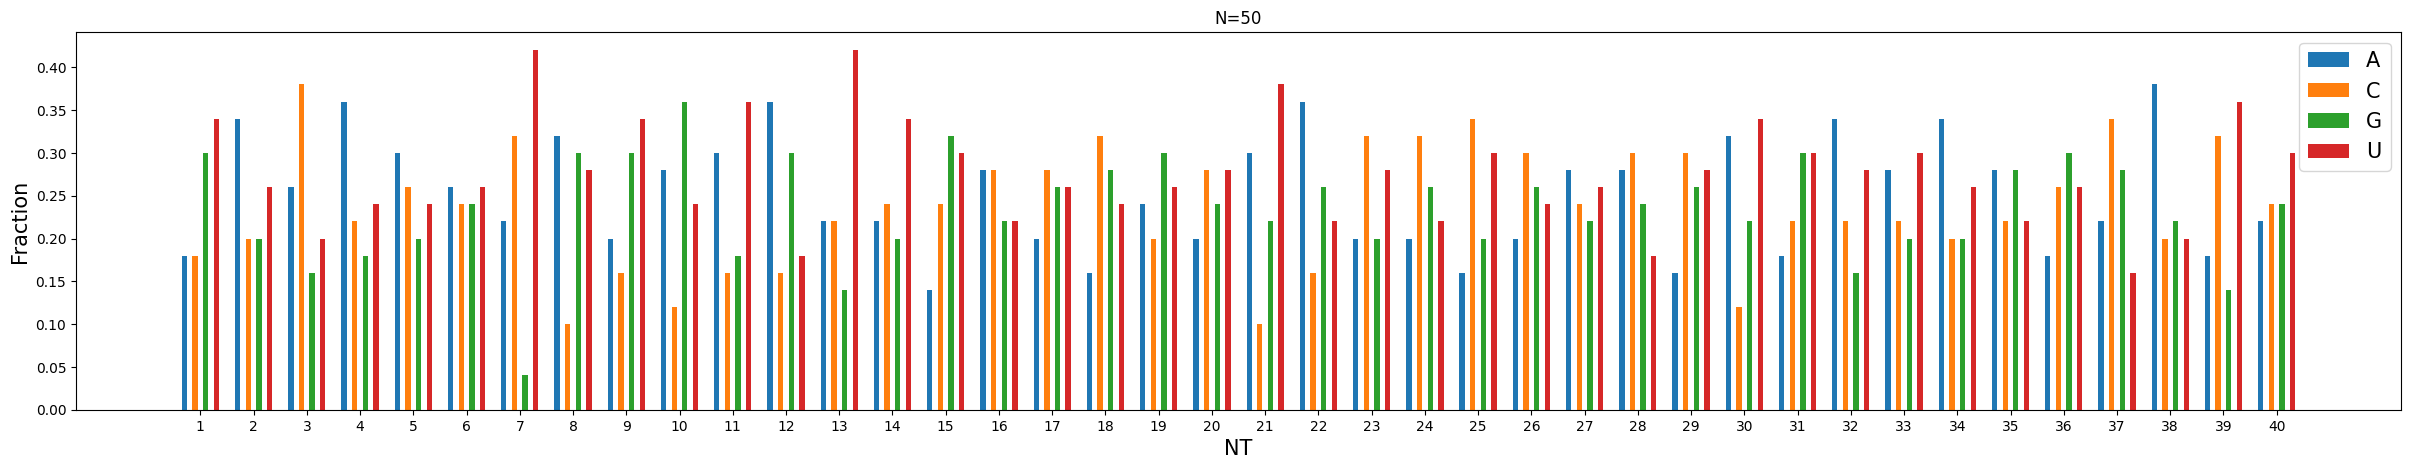

In [ ]:
#Visulaize random sequences
a = []
c = []
g = []
u = []

position = 0

for position in range(L):
  nuc_distribution = sorted([(k, v) for k, v in collections.Counter([seq[position] for seq in starting_pool]).items()], key = lambda x: x[0], reverse=False)
  a.append(nuc_distribution[0][1]/N)
  c.append(nuc_distribution[1][1]/N)
  g.append(nuc_distribution[2][1]/N)
  u.append(nuc_distribution[3][1]/N)

x = np.arange(len( range(1,L+1)))  
width = 0.1  
fig, ax = plt.subplots(figsize = (30,5), dpi = 100)
rects1 = ax.bar(-.3+x, a, width, label='A')
rects2 = ax.bar(-.1+x, c, width, label='C')
rects3 = ax.bar(.1+x, g, width, label='G')
rects4 = ax.bar(.3+x, u, width, label='U')
ax.set_ylabel('Fraction', fontsize = 15)
ax.set_xlabel('NT', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels( range(1,L+1))
ax.legend(fontsize = 15)
ax.set_title('N='+str(N))
